In [1]:
import matplotlib.pyplot as plt
from tinygrad.tensor import Tensor
import numpy as np

In [2]:
class ImprovedEnvironment:
    def __init__(self, num_agents, num_tasks):
        self.num_agents = num_agents
        self.num_tasks = num_tasks
        self.agents = [ImprovedAgent(i, num_tasks) for i in range(num_agents)]
        self.performance = {i: {task: []
                                for task in range(num_tasks)} for i in range(num_agents)}
        self.agent_positions = {i: [] for i in range(num_agents)}
        self.rewards = {i: {task: []
                            for task in range(num_tasks)} for i in range(num_agents)}
    def step(self):
        for agent in self.agents:
            for task in range(self.num_tasks):
                loss, reward = agent.observe(task)
                self.performance[agent.id][task].append(loss)
                self.rewards[agent.id][task].append(reward)
            self.agent_positions[agent.id].append(
                np.random.rand(2))  # Random 2D positions

In [3]:
class ImprovedAgent:
    def __init__(self, id, num_tasks):
        self.id = id
        self.num_tasks = num_tasks
        self.models = [ImprovedLLM() for _ in range(num_tasks)]
    def observe(self, task):
        observations = np.random.rand(10)
        target = np.sum(observations)
        loss = self.models[task].train(observations, target)
        reward = self.calculate_reward(loss)
        return loss, reward
    def calculate_reward(self, loss):
        # Define a simple reward function (can be task-specific)
        return -loss  # Negative loss as reward

In [4]:
class ImprovedLLM:
    def __init__(self):
        self.w1 = Tensor(np.random.randn(5, 10), requires_grad=True)
        self.w2 = Tensor(np.random.randn(5), requires_grad=True)
    def forward(self, x):
        x = Tensor(x).reshape(1, -1)
        x = self.w1.dot(x.transpose()).relu()
        return self.w2.dot(x)
    def train(self, x, y_true):
        y_pred = self.forward(x)
        loss = ((y_pred - Tensor(y_true)) ** 2).sum()
        loss.backward()
        learning_rate = 0.01
        self.w1 = self.w1 - self.w1.grad * learning_rate
        self.w2 = self.w2 - self.w2.grad * learning_rate
        return loss.numpy()

Create environment with 3 agents and 2 tasks

In [5]:
env = ImprovedEnvironment(num_agents=3, num_tasks=2)

Assume 50 steps for training

In [6]:
for step in range(50):
    env.step()

Plot agent positions

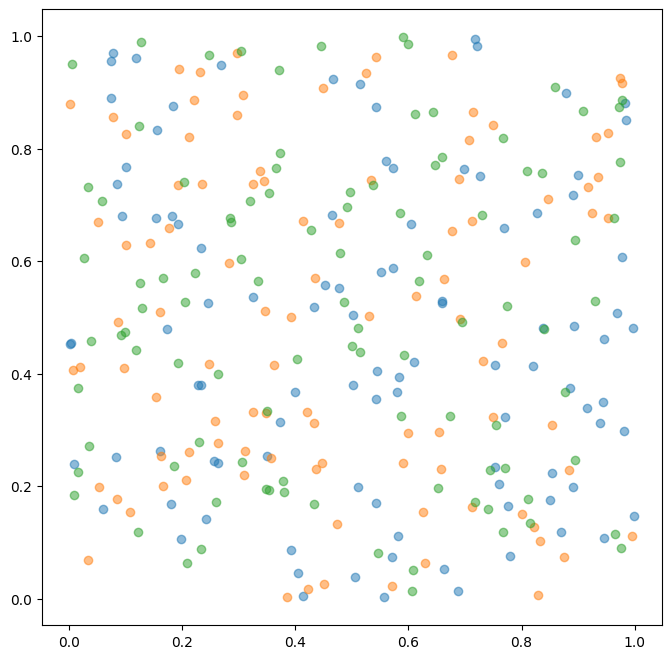

In [7]:
plt.figure(figsize=(8, 8))
for agent_id, positions in env.agent_positions.items():
    positions = np.array(positions)
    plt.scatter(positions[:, 0], positions[:, 1],
                label=f'Agent {agent_id}', alpha=0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


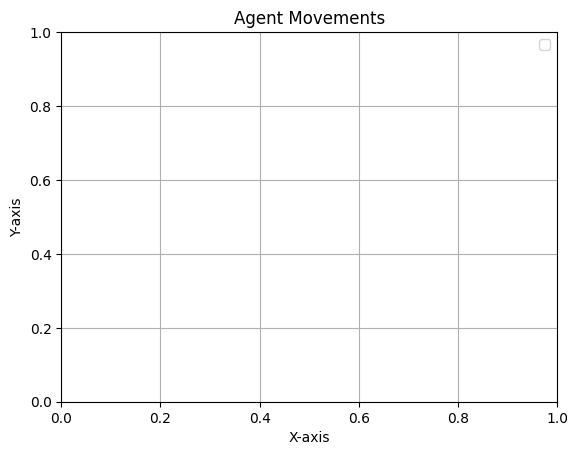

In [8]:
plt.legend()
plt.title('Agent Movements')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

Plot performance for task 0

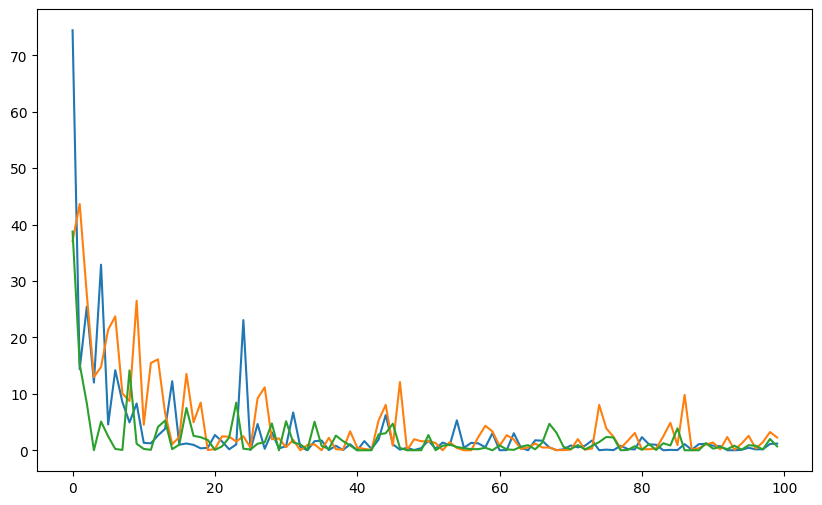

In [9]:
plt.figure(figsize=(10, 6))
for agent_id, losses in env.performance.items():
    plt.plot(losses[0], label=f'Agent {agent_id}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


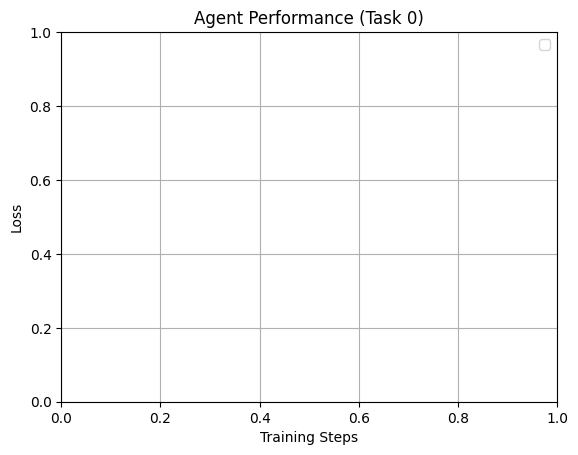

In [10]:
plt.legend()
plt.title('Agent Performance (Task 0)')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Plot performance for task 1

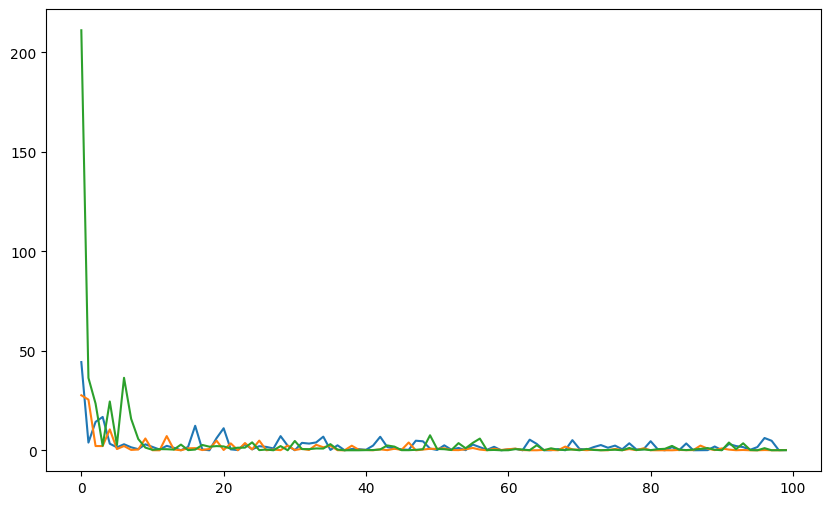

In [11]:
plt.figure(figsize=(10, 6))
for agent_id, losses in env.performance.items():
    plt.plot(losses[1], label=f'Agent {agent_id}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


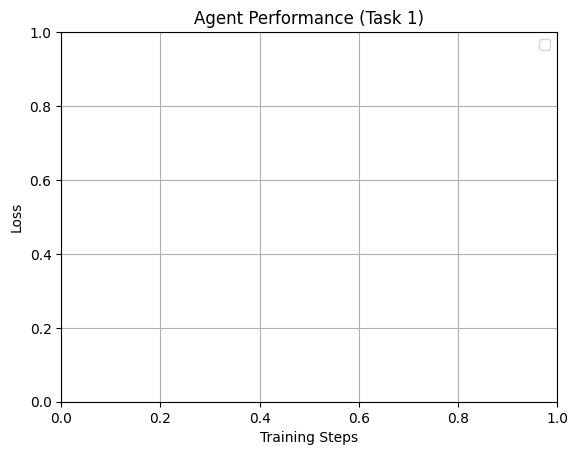

In [12]:
plt.legend()
plt.title('Agent Performance (Task 1)')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Plot rewards for task 0

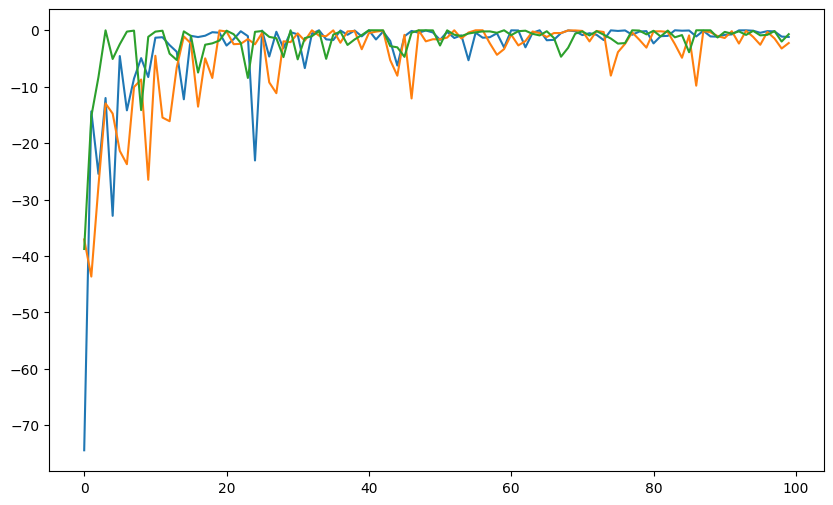

In [13]:
plt.figure(figsize=(10, 6))
for agent_id, rewards in env.rewards.items():
    plt.plot(rewards[0], label=f'Agent {agent_id}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


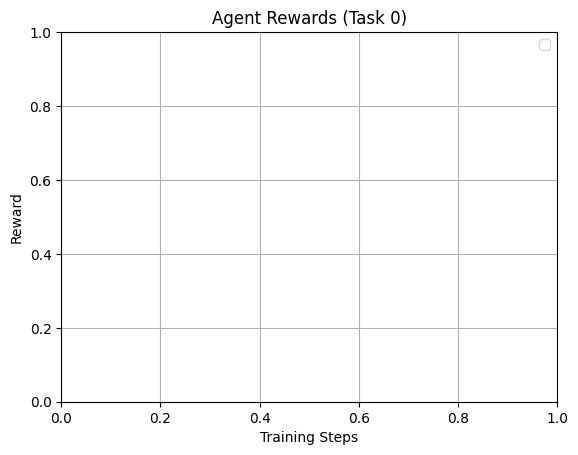

In [14]:
plt.legend()
plt.title('Agent Rewards (Task 0)')
plt.xlabel('Training Steps')
plt.ylabel('Reward')
plt.grid(True)
plt.show()

Plot rewards for task 1

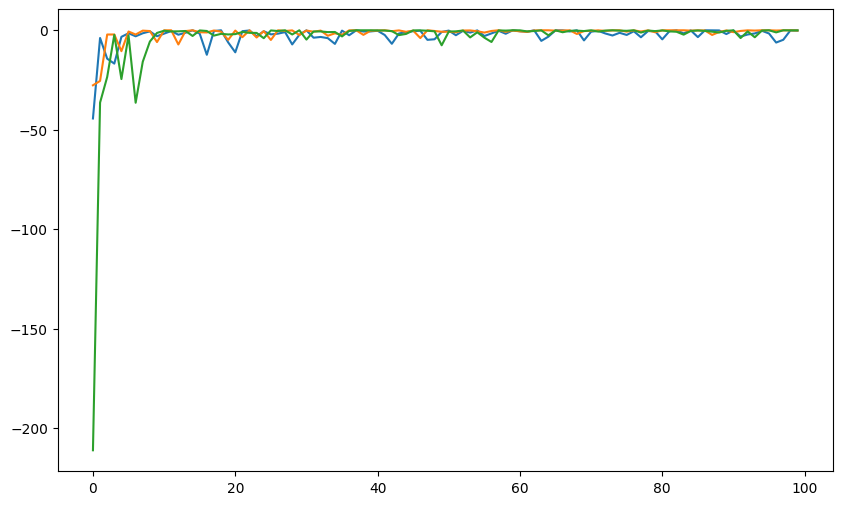

In [15]:
plt.figure(figsize=(10, 6))
for agent_id, rewards in env.rewards.items():
    plt.plot(rewards[1], label=f'Agent {agent_id}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


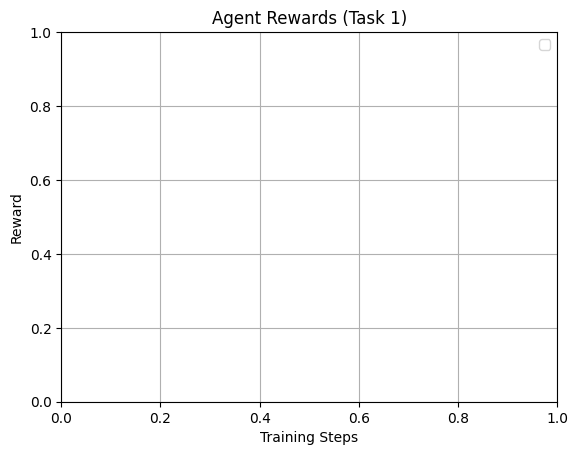

In [16]:
plt.legend()
plt.title('Agent Rewards (Task 1)')
plt.xlabel('Training Steps')
plt.ylabel('Reward')
plt.grid(True)
plt.show()